In [11]:
from Prototype.crystals.crystal_structure import CrystalStructure
import matplotlib.pyplot as plt
import numpy as np
from Prototype.simulation.sequence_builder import SequenceBuilder
from Prototype.simulation.simulation_runner import SimulationRunner
from Prototype.plotting_helper import *

In [18]:
crystal = CrystalStructure.from_file("../../native_crystal_database/two_edges_binary_unbiased.dat")
seq_builder = SequenceBuilder(crystal, configs="test")
seq, back_converter = seq_builder.create_sequence()

runner = SimulationRunner()

In [19]:
print(f"Omega max: {seq_builder.omega_max}")
print(f"T should be >> {1 / seq_builder.omega_max * 1000}")

Omega max: 0.313541998793271
T should be >> 3189.3653923515817


In [20]:
seq._device.rydberg_blockade_radius(seq_builder.omega_max)

16.079999999999995

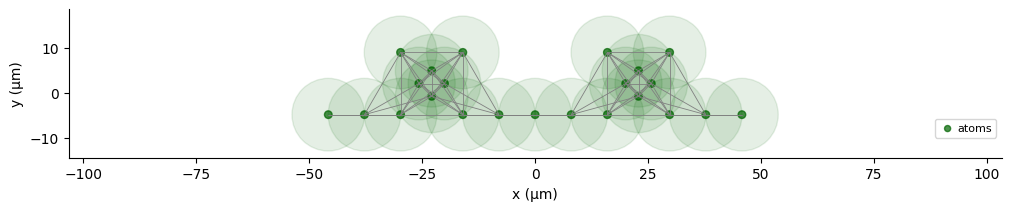

In [21]:
seq.register.draw(
    with_labels = False,
    blockade_radius = seq._device.rydberg_blockade_radius(seq_builder.omega_max),
    draw_half_radius = True
)

In [22]:
runner.send_batch(seq, 1000)

In [23]:
# raise Exception("stop!")

In [24]:
# id = "40f615dd-cf42-4a13-8717-0c83ea40e628"
# runner.get_batch_by_id(id).status
# count_dict = runner.get_batch_by_id(id).result

batch = runner.wait_and_get_last_sent_batch(wait_time = 720)
count_dict = batch.result

Waiting for the job to complete...
Job is done! Status = ERROR


In [25]:
# count_dict = runner.simulate_locally(seq, runs=10000)

AttributeError: 'NoneType' object has no attribute 'values'

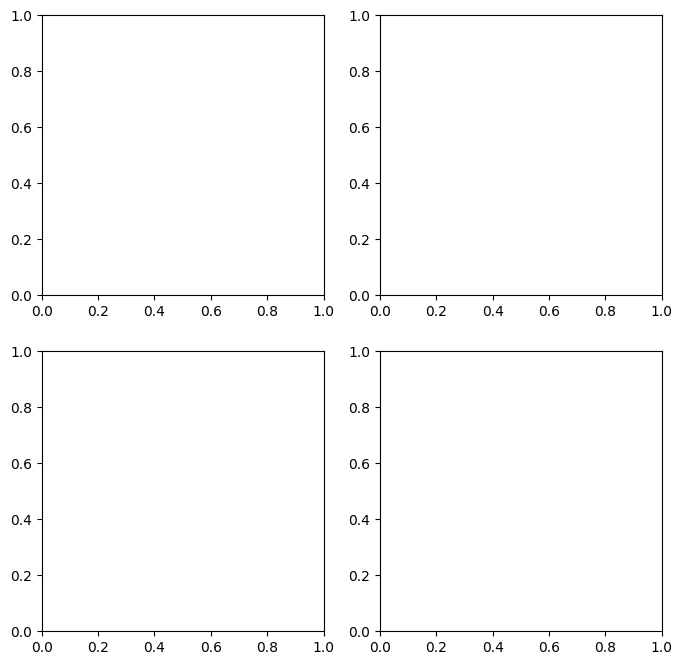

In [10]:
nrows, ncols = 2, 2
fig, ax = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows), dpi=100)
ax = ax.ravel()

total_count = sum(list(count_dict.values()))
count_covered = 0
for i in range(min(len(ax), len(count_dict))):
    m = list(count_dict.keys())[i]
    seq.register.draw(
        qubit_colors={f"q{k}": "red" for k in range(len(m)) if m[k] == '1'},
        show = False,
        custom_ax=ax[i],
        with_labels = False
    )
    percentage = count_dict[m]/total_count * 100
    count_covered += count_dict[m]
    ax[i].set_title(f"{str(round(percentage, 2))}%", fontsize=30)
    ax[i].get_legend().set_visible(False)
for i in range(len(count_dict), len(ax)):
    ax[i].set_visible(False)

plt.suptitle(f"Top {str(round(count_covered/total_count*100, 2))}% Results\n", fontsize=50)
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'keys'

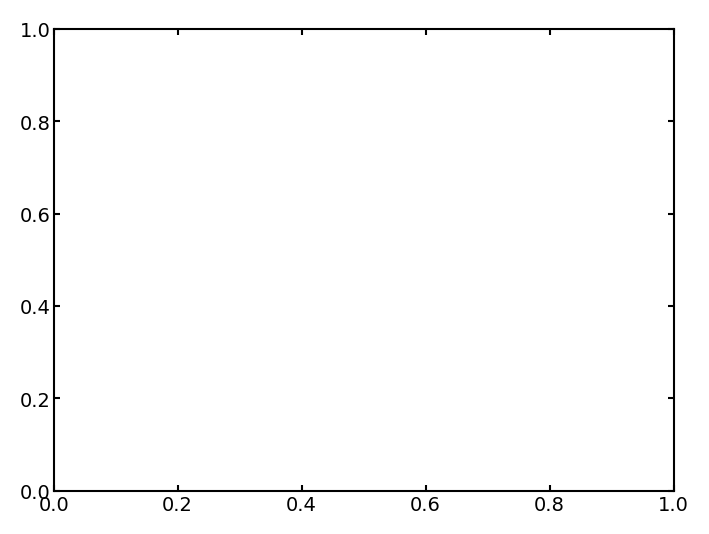

In [ ]:
fig, ax = getStylishFigureAxes(1, 1, figsize=(4,3))

ax.bar(count_dict.keys(), 100 * np.array(list(count_dict.values()))/sum(list(count_dict.values())), width=0.5)
plt.xticks(rotation=90)
ax.set_ylabel("Probability [%]")

plt.show()